In [1]:
import pyspark

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
0,application_1648966508985_0002,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [2]:
%%configure -f
{ "conf":{
          "spark.pyspark.python": "python3.7",
          "spark.pyspark.virtualenv.enabled": "true",
          "spark.pyspark.virtualenv.type":"native",
          "spark.pyspark.virtualenv.bin.path":"/usr/bin/virtualenv",
          "spark.driver.maxResultSize":"15g"
         }
}

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
1,application_1648966508985_0003,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
1,application_1648966508985_0003,pyspark,idle,Link,Link,✔


In [7]:
sc.install_pypi_package("pandas==1.2.2")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

An error was encountered:
Package already installed for current Spark context!
Traceback (most recent call last):
  File "/usr/lib/spark/python/lib/pyspark.zip/pyspark/context.py", line 1110, in install_pypi_package
    raise ValueError("Package already installed for current Spark context!")
ValueError: Package already installed for current Spark context!



In [6]:
sc.install_pypi_package("IPython")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

An error was encountered:
Package already installed for current Spark context!
Traceback (most recent call last):
  File "/usr/lib/spark/python/lib/pyspark.zip/pyspark/context.py", line 1110, in install_pypi_package
    raise ValueError("Package already installed for current Spark context!")
ValueError: Package already installed for current Spark context!



In [8]:
sc.install_pypi_package("matplotlib==3.1.1", "https://pypi.org/simple")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

An error was encountered:
Package already installed for current Spark context!
Traceback (most recent call last):
  File "/usr/lib/spark/python/lib/pyspark.zip/pyspark/context.py", line 1110, in install_pypi_package
    raise ValueError("Package already installed for current Spark context!")
ValueError: Package already installed for current Spark context!



In [9]:
import pandas
from pyspark.sql.functions import *

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [11]:
review = spark.read.orc("hdfs:///NLP-orc/*.orc")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [12]:
review.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- cool: long (nullable = true)
 |-- funny: long (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)

In [13]:
gr_star = review.groupBy("stars").count()
gr_star_df = gr_star.sort(["stars"]).toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [14]:
gr_star_df

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

   stars    count
0    1.0  1262800
1    2.0   711378
2    3.0   926656
3    4.0  1920037
4    5.0  3814532

In [15]:
import matplotlib.pyplot as plt
# plt = plt.bar(x=gr_star_df["stars"], y=gr_star_df["count"],height = 0.8, width=0.8) # bottom=None, align='center', data=gr_star_df)  

#gr_star_df.plot(kind='bar')

plt.clf()
gr_star_df.plot(kind='bar', x='stars',y='count', legend=None, figsize=(8,6))
plt.title('Number of text rows for star rating')
plt.xlabel('Star Rating')
plt.ylabel('Text rows count')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Text(0, 0.5, 'Text rows count')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

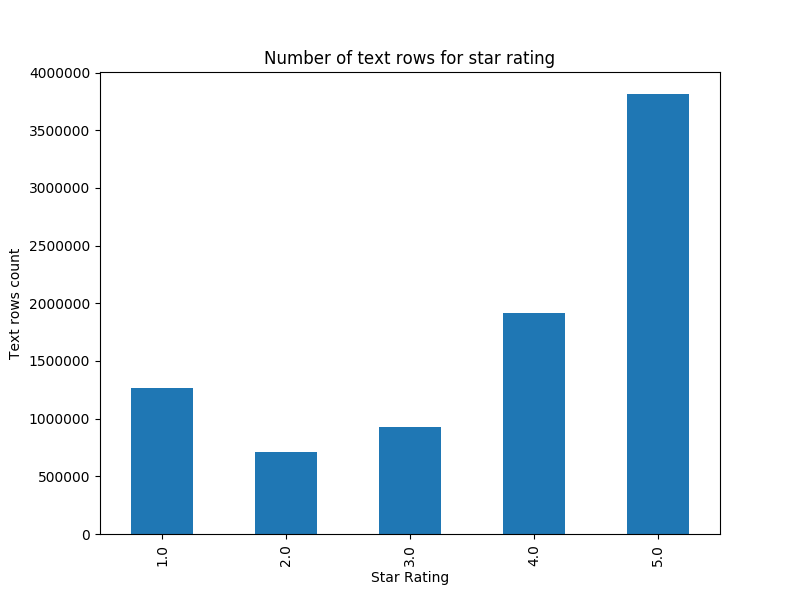

In [16]:
%matplot plt

In [17]:
review.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in review.columns]).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----+-----+-----+----+------+
|cool|funny|stars|text|useful|
+----+-----+-----+----+------+
|   0|    0|    0|   0|     0|
+----+-----+-----+----+------+

In [18]:
import numpy as np
num = 710000

one_per = np.round(float(num/gr_star_df['count'][0]),4)
two_per = np.round(float(num/gr_star_df['count'][1]),4)
three_per = np.round(float(num/gr_star_df['count'][2]),4)
four_per = np.round(float(num/gr_star_df['count'][3]),4)
five_per = np.round(float(num/gr_star_df['count'][4]),4)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [19]:
print("one star percent: ",one_per,
      "\ntwo star percent: ",two_per,
      "\nthree star percent: ",three_per,
      "\nfour star percent: ",four_per,
      "\nfive star percent: ",five_per)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

one star percent:  0.5622 
two star percent:  0.9981 
three star percent:  0.7662 
four star percent:  0.3698 
five star percent:  0.1861

In [20]:
one_star = review.filter(col('stars')==1.0)
two_star = review.filter(col('stars')==2.0)
three_star = review.filter(col('stars')==3.0)
four_star = review.filter(col('stars')==4.0)
five_star = review.filter(col('stars')==5.0)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [21]:
two_star.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

711378

In [22]:
df_one_sample = one_star.sample(False,one_per, seed = 42)
df_two_sample = two_star.sample(False,two_per, seed = 42)
df_three_sample = three_star.sample(False,three_per, seed = 42)
df_four_sample = four_star.sample(False,four_per, seed = 42)
df_five_sample = five_star.sample(False,five_per, seed = 42)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [23]:
print(df_four_sample.count())
print(df_five_sample.count())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

709372
708929

In [24]:
df = df_one_sample.unionAll(df_two_sample.unionAll(df_three_sample.unionAll(df_four_sample.unionAll(df_five_sample))))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [25]:
df.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

3547875

In [26]:
df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- cool: long (nullable = true)
 |-- funny: long (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)

In [27]:
df_new = df.orderBy(rand())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [28]:
df_new_cnt = df_new.groupBy("stars").count()
df_new_cnt_pd = df_new_cnt.sort(["stars"]).toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [29]:
plt.clf()
df_new_cnt_pd.plot(kind='bar', x='stars',y='count', legend=None, figsize=(8,6))
plt.title('Number of text rows for star rating')
plt.xlabel('Star Rating')
plt.ylabel('Text rows count')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Text(0, 0.5, 'Text rows count')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

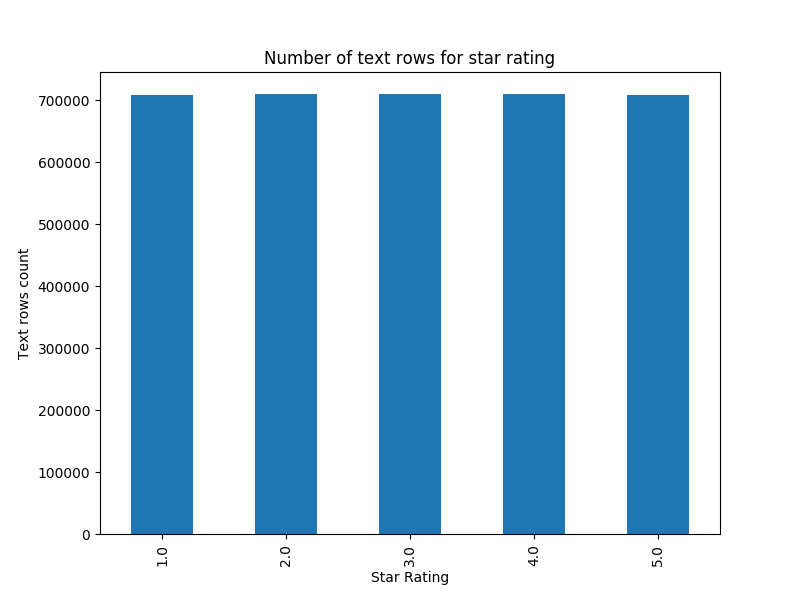

In [30]:
%matplot plt

In [32]:
df_new.write.orc("s3://akshay-yelp/yelp_academic_dataset_review_shrunk/")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [35]:
aa=df_new.limit(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [36]:
aa.show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----+-----+-----+--------------------+------+
|cool|funny|stars|                text|useful|
+----+-----+-----+--------------------+------+
|   0|    0|  1.0|If I could give t...|     2|
|   0|    0|  2.0|This Wendy's is s...|     1|
|   0|    0|  3.0|Their Indian comb...|     1|
|   0|    0|  5.0|My kind of place,...|     0|
|   0|    0|  3.0|Pizza's great dru...|     0|
|   0|    0|  4.0|Good medium sized...|     0|
|   1|    2|  1.0|The place, employ...|     2|
|   3|    1|  1.0|I'm putting this ...|    41|
|   0|    0|  3.0|The veggie crepes...|     0|
|   0|    0|  2.0|Having worked at ...|     0|
+----+-----+-----+--------------------+------+

In [46]:
count_cool = review.groupBy("cool").count()
count_cool = count_cool.sort(["cool"]).limit(30).toPandas()
count_cool


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

    cool    count
0      0  6686980
1      1  1206387
2      2   364606
3      3   145669
4      4    71554
5      5    41205
6      6    26768
7      7    18320
8      8    13275
9      9    10066
10    10     7672
11    11     6318
12    12     5073
13    13     4118
14    14     3471
15    15     2829
16    16     2381
17    17     1961
18    18     1675
19    19     1474
20    20     1251
21    21     1064
22    22      950
23    23      777
24    24      770
25    25      644
26    26      530
27    27      491
28    28      419
29    29      372

In [47]:
plt.clf()
count_cool.plot(kind='bar', x='cool',y='count', legend=None, figsize=(20,15))
plt.title('Number of text rows for cool')
plt.xlabel('cool')
plt.ylabel('count')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Text(0, 0.5, 'count')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

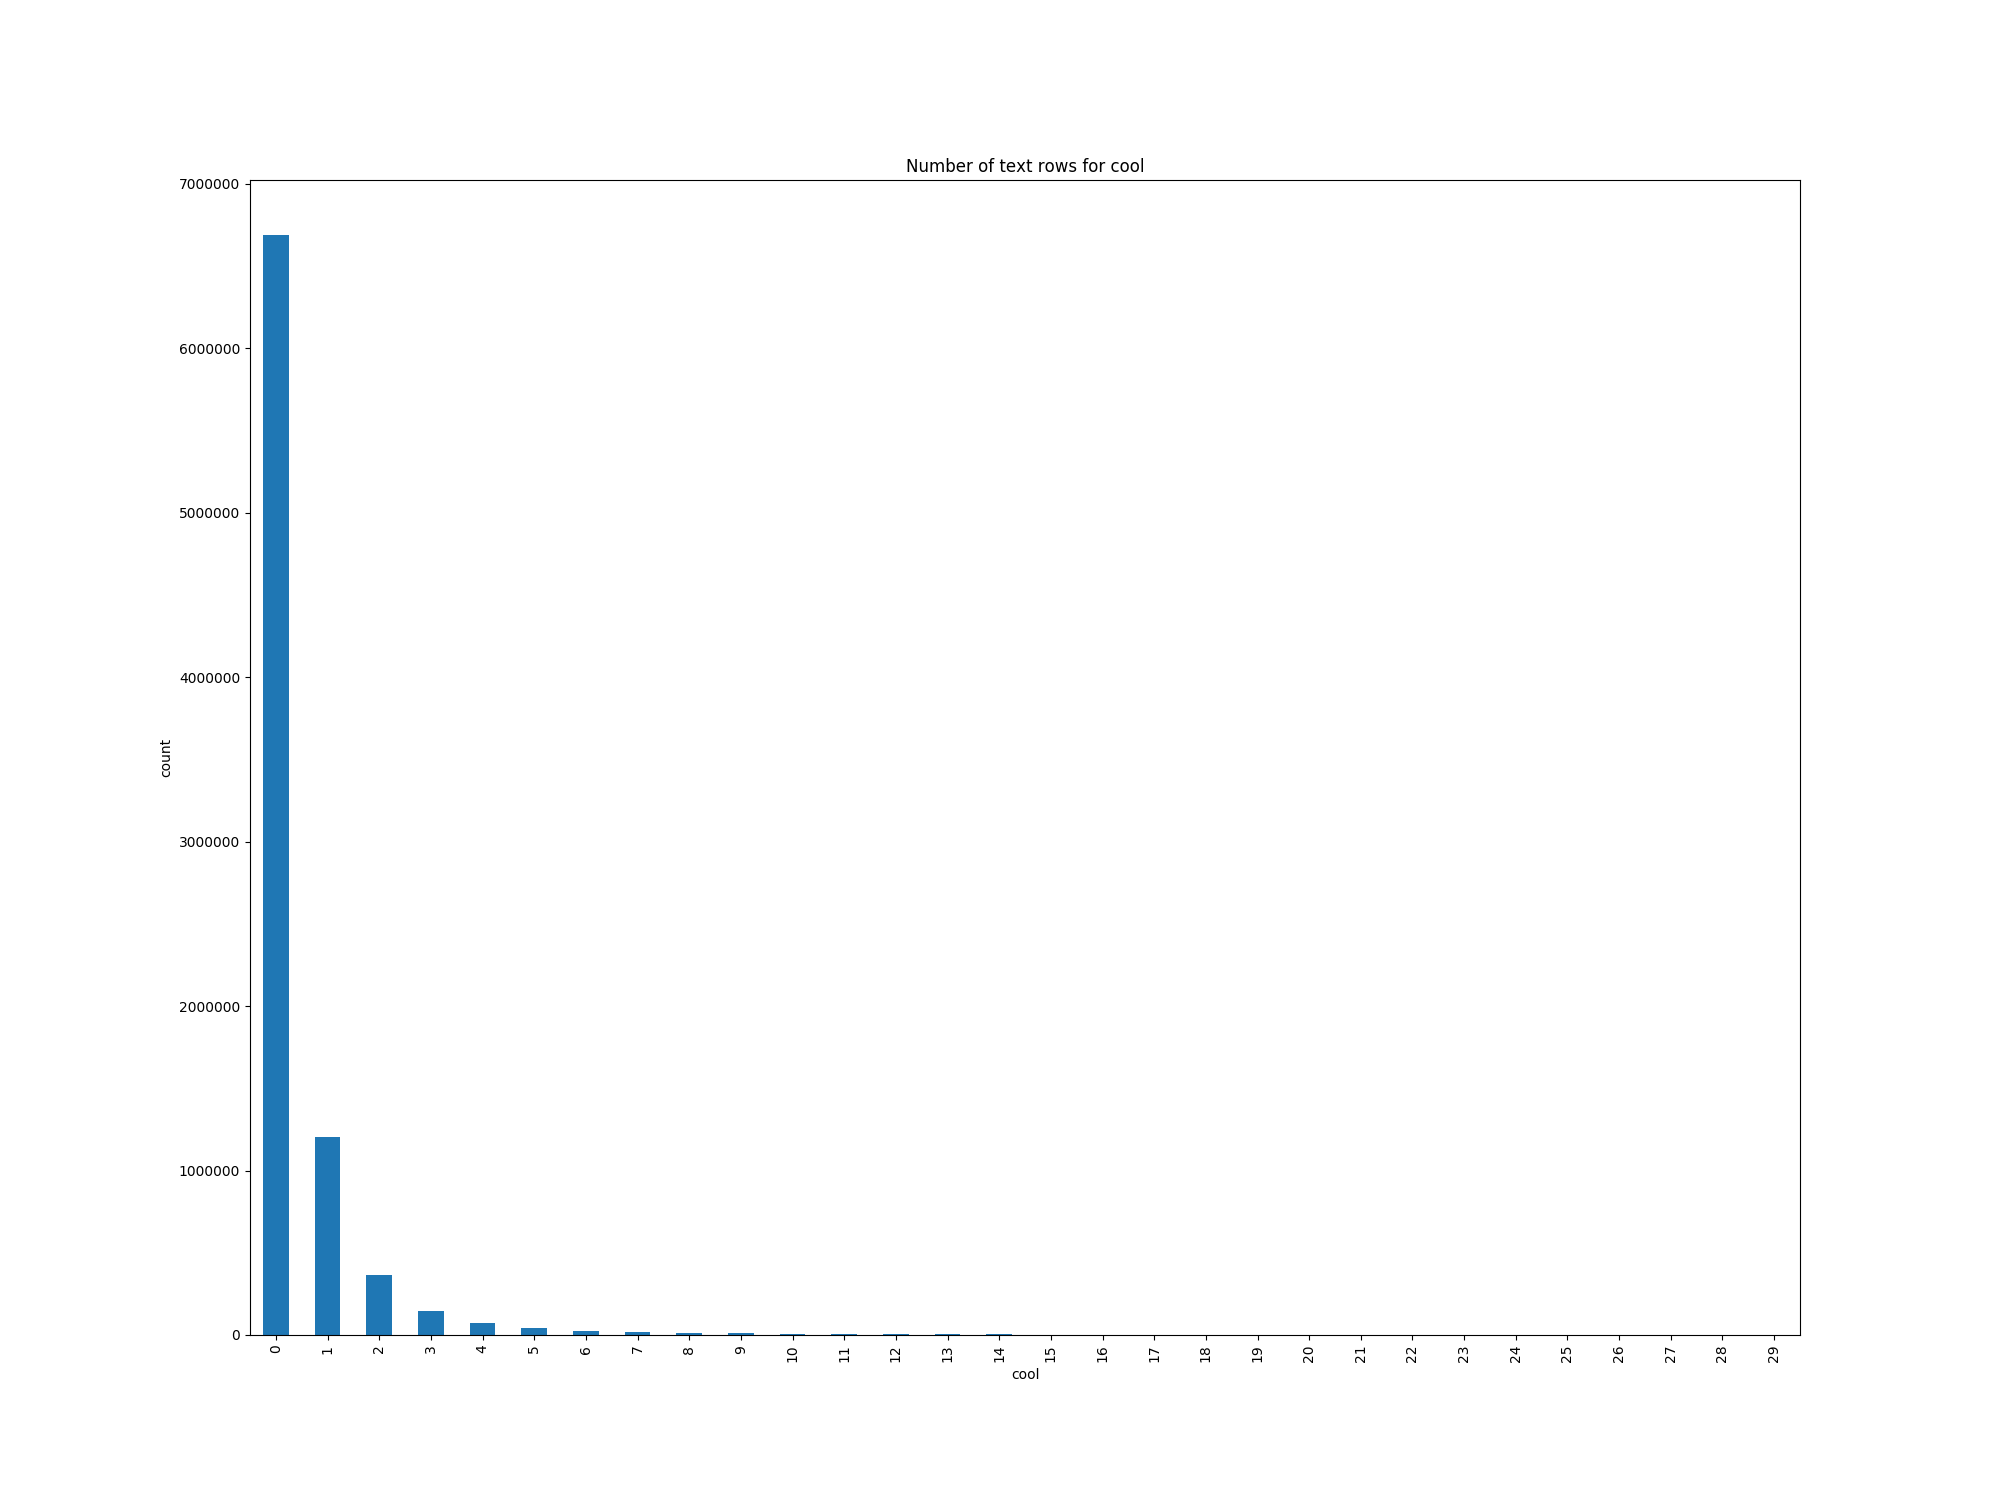

In [48]:
%matplot plt